PERFORMANCE COMPARISON BETWEEN SUPPORT VECTOR MACHINES AND RANDOM FOREST FOR MNIST DIGIT RECOGNITION

In [49]:
# We import important libraries and data needed for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# the next line reads the digits from scikit learn
from sklearn.datasets import load_digits

digits_data = load_digits()  # store data in a variable called digits_data

In [5]:
# we check the type of data
print(type(digits_data))

<class 'sklearn.utils.Bunch'>


In [6]:
#data is in form of a dictionary so we access it through keys and indexing
print(digits_data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [7]:
print(list(digits_data['feature_names']))

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [8]:
# Lets see a description of the entire data
print(digits_data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
# images in the data contain an 8 x 8 matrix of each 1797 hand written digits
print(digits_data.images)
digits_data.images.shape

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

(1797, 8, 8)

<Figure size 432x288 with 0 Axes>

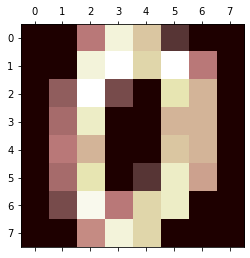

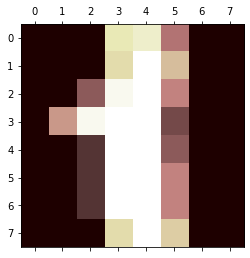

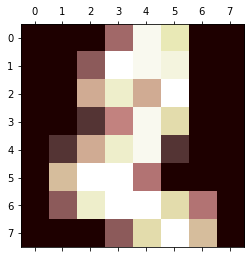

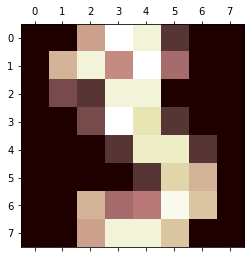

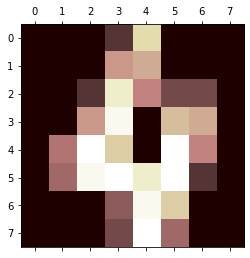

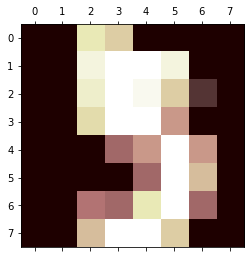

In [10]:
#print out some of the digits in our data
for i in range(0,6):
    plt.pink()
    plt.matshow(digits_data.images[i])

In [11]:
# Check the info and size of 'data'
print(digits_data['data'])
print((digits_data['data']).shape) # tells us no of rows and columns

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


We can observe from the data size that the 1797, 8x8 matrix for each image was reshaped to 1797,64. Each column represents the reshaped pixels for each handwritten- digits. 

In [12]:
# Check the info and size of 'target'
print(digits_data['target'])
print((digits_data['target']).shape) 

[0 1 2 ... 8 9 8]
(1797,)


Target contains the label of 1797 digits. Ranges from 0-9

In [14]:
# Assign data to X and target to y
X = digits_data['data']
y = digits_data['target']

In [15]:
# Lets convert our data to a panda DataFrame for easy access to information.
digit_df = pd.DataFrame(digits_data['data'], columns = digits_data['feature_names'])
digit_df['target'] = digits_data['target']
digit_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [18]:
#check that we have no missing info or wrong type in our data
digit_df.dtypes
digit_df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

### DATA VISUALIZATION

<AxesSubplot:xlabel='target', ylabel='count'>

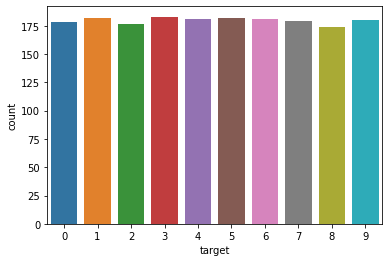

In [19]:
# check to see if we have a balanced number of each digit class
sns.countplot(data = digit_df, x = 'target')

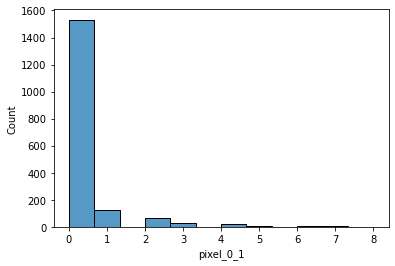

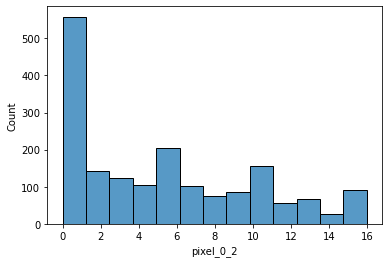

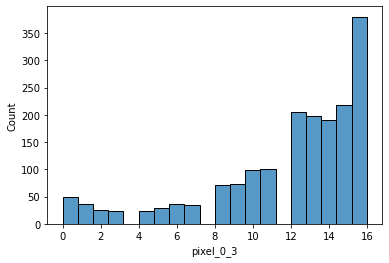

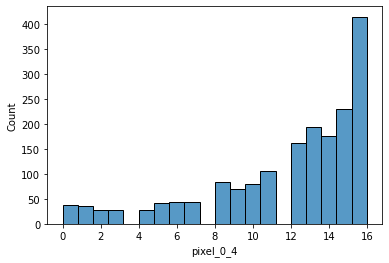

In [22]:
# Plot the distribution of some of our features
for i in digit_df.columns[1:5]:
    sns.histplot(data=digit_df,x = digit_df[i])
    plt.show()

our features need to be standardized

### Data Preprocessing

In [23]:
# we split our X and y data into train and split set

from sklearn.model_selection import train_test_split
X_trainu,X_testu,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=123,stratify=y)

In [24]:
# Standardize or data using sklearn standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train =scaler.fit_transform(X_trainu)
X_test = scaler.transform(X_testu)

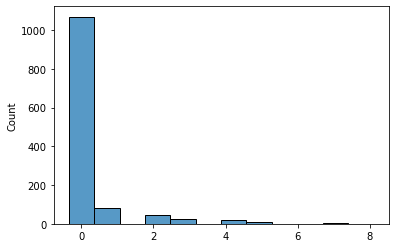

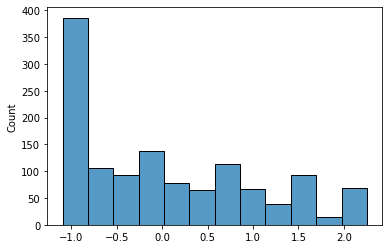

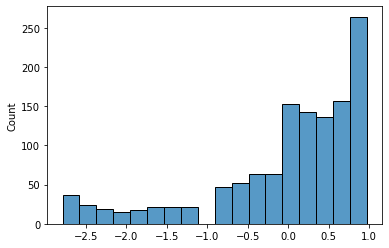

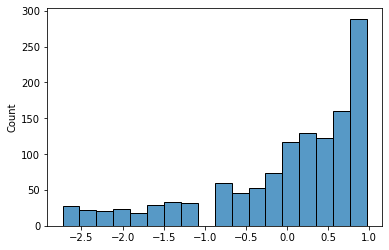

In [26]:
# Plot the distribution of some of our features to see the effect of standardization
for i in range(1,5):
    sns.histplot(data=X_train,x = X_train[:,i])
    plt.show()

### Build SVM classifier for processed data

In [28]:
# First we build our model using the default parameters in the svm classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [29]:
# we make some predictions with our model
y_train_pred1 = svc.predict(X_train)
y_test_pred1 = svc.predict(X_test)

# we calculate the classifiation accuracy and error using score.
class_acc_train = svc.score(X_train,y_train) # accuracy score for training set
class_acc_test = svc.score(X_test,y_test) # accuracy score for test set

class_err_train = 1-class_acc_train
class_err_test = 1 - class_acc_test

print('For default model (c = 1,kernel = rbf):\nclassification accuracy for train set: %.4f\nclassification error for\
    train set is: %.4f\n\nclassification accuracy for test set: %.4f\nclassification error for test set:\
    %.4f'%(class_acc_train,class_err_train,class_acc_test,class_err_test))

For default model (c = 1,kernel = rbf):
classification accuracy for train set: 0.9968
classification error for    train set is: 0.0032

classification accuracy for test set: 0.9852
classification error for test set:    0.0148


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.93      0.96        59
           2       0.98      1.00      0.99        52
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        54
           5       0.98      1.00      0.99        54
           6       1.00      0.96      0.98        56
           7       0.98      0.98      0.98        54
           8       0.92      1.00      0.96        48
           9       0.98      0.98      0.98        54

    accuracy                           0.99       540
   macro avg       0.98      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



<AxesSubplot:>

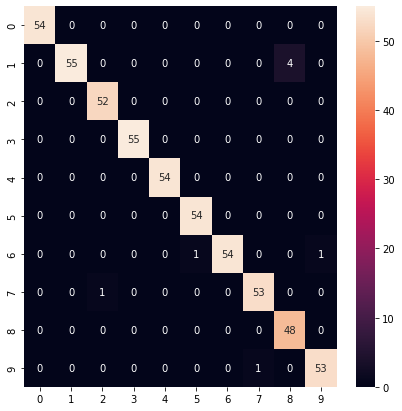

In [33]:
#import confusion matrix to view our error
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_pred1,y_test))
#classification_report(svc,y_test_pred1,y_test)

plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test_pred1,y_test), annot = True)

Model has a good accuracy with c = 1 and  RBF kernel. We try to optimize it by trying different values of c

In [40]:
# lets create and empty list to store our classification error values for differeent c values

list_train =  [] # this will contain list of classification errors for training set
list_test = [] # this will contain list of classification errors for test set

c_range = np.linspace(0.1,50,100)
for c in c_range :
    svm = SVC(C=c, kernel='rbf')
    svm.fit(X_train,y_train)
    y_pred_train = svm.predict(X_train)
    y_pred_test = svm.predict(X_test)
    list_train.append (1 - svm.score(X_train,y_train))
    list_test.append (1 - svm.score(X_test,y_test))

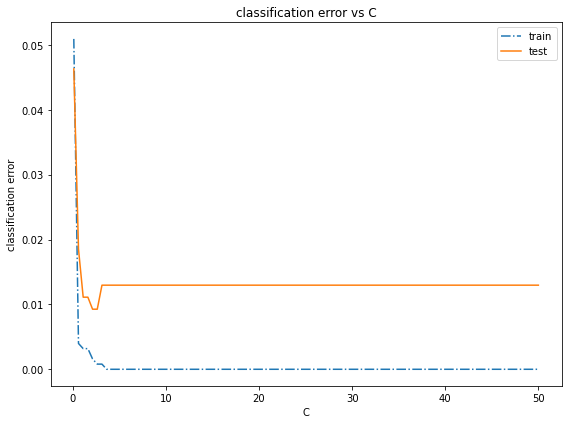

In [41]:
fig,axes = plt.subplots(1,1,figsize = (8,6))
# when p =1
axes.plot(c_range,list_train,'-.',label = 'train')
axes.plot(c_range,list_test, label = 'test')

axes.set_xlabel('C')
axes.set_ylabel('classification error')
axes.set_title('classification error vs C')
axes.legend()
plt.tight_layout()

In [42]:
# we find the exact value of the minimum classification error for test set and the corrsponding c value
min_error1 = min(list_test)
c_val1 = list_test.index(min_error1) + 1

print('for RBF Kernel, minimum classification error for test set is %.4f and c is %.1f'%(min_error1,c_val1))

for RBF Kernel, minimum classification error for test set is 0.0093 and c is 5.0


We repeat same process for Linear, and polynomial kernel

In [46]:
# lets create and empty list to store our classification error values for different c and  kernel = linear and polynomial

list1_train =  [] # this will contain list of classification errors for training set with linar kernel
list1_test = [] # this will contain list of classification errors for test set with linear kenel

list2_train = [] # this will contain list of classification errors for training set with polynomial kernel
list2_test = [] # this will contain list of classification errors for test set with polynomial kernel

c_range = np.linspace(0.01,50,100)
for kernel in ['linear', 'poly']:
    if kernel == 'linear':
        for c in c_range:
            svm1 = SVC(C=c,kernel=kernel)
            svm1.fit(X_train,y_train)
            y_pred_train = svm1.predict(X_train)
            y_pred_test = svm1.predict(X_test)
            list1_train.append (1 - svm1.score(X_train,y_train))
            list1_test.append (1 - svm1.score(X_test,y_test))
    else:
        for c in c_range:
            svm2 = SVC(C=c,kernel=kernel)
            svm2.fit(X_train,y_train)
            y_pred_train = svm2.predict(X_train)
            y_pred_test = svm2.predict(X_test)
            list2_train.append (1 - svm2.score(X_train,y_train))
            list2_test.append (1 - svm2.score(X_test,y_test))

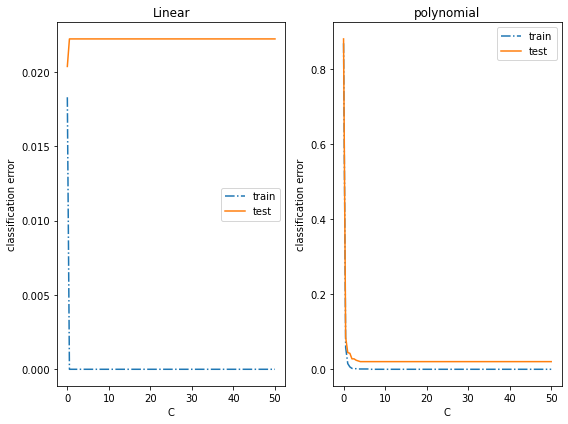

In [47]:
fig,axes = plt.subplots(1,2,figsize = (8,6))
# when p =1
axes[0].plot(c_range,list1_train,'-.',label = 'train')
axes[0].plot(c_range,list1_test, label = 'test')

# when p = 2
axes[1].plot(c_range,list2_train,'-.',label = 'train' )
axes[1].plot(c_range,list2_test,label = 'test')

axes[0].set_xlabel('C')
axes[0].set_ylabel('classification error')
axes[0].set_title('Linear')
axes[0].legend()

axes[1].set_xlabel('C')
axes[1].set_ylabel('classification error')
axes[1].set_title('polynomial')
axes[1].legend()
plt.tight_layout()

In [48]:
# we find the exact value of the minimum classification error for test set and the corrsponding C for linear and polynomial

# for linear 

min_error1 = min(list1_test)
c_val1 = list1_test.index(min_error1) + 1

#for polynomial
min_error2 = min(list2_test)
c_val2 = list2_test.index(min_error2)+1

print('For linear, minimum classification error is %.4f and c is %.1f'%(min_error1,c_val1))
print('\nFor polynomial, minimum classification error is %.4f and c is %.1f'%(min_error2,c_val2))

For linear, minimum classification error is 0.0204 and c is 1.0

For polynomial, minimum classification error is 0.0204 and c is 9.0


We use grid search to further find the optimum accuracy using cross validation

In [50]:
# we implement a gridsearch for deifferent C values and kernel type to find model with the best accuracy.\
#  We have a balanced dataset so accuracy is a good perfromance test.
svc = SVC()
c_range = np.linspace(0.01,50,200)
parameters = [
    {'kernel':['linear','poly','rbf'],'C':c_range}
]
clf = GridSearchCV(estimator = svc,param_grid=parameters,scoring='accuracy',cv= 3,verbose=1)
clf.fit(X_test,y_test)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': array([1.00000000e-02, 2.61206030e-01, 5.12412060e-01, 7.63618090e-01,
       1.01482412e+00, 1.26603015e+00, 1.51723618e+00, 1.76844221e+00,
       2.01964824e+00, 2.27085427e+00, 2.52206030e+00, 2.77326633e+00,
       3.02447236e+00, 3.27567839e+00, 3.52688442e+00, 3.77809045e+00,
       4.02929648e+00, 4.28050251e+00, 4.53170854e+00, 4.78291...
       4.52270854e+01, 4.54782915e+01, 4.57294975e+01, 4.59807035e+01,
       4.62319095e+01, 4.64831156e+01, 4.67343216e+01, 4.69855276e+01,
       4.72367337e+01, 4.74879397e+01, 4.77391457e+01, 4.79903518e+01,
       4.82415578e+01, 4.84927638e+01, 4.87439698e+01, 4.89951759e+01,
       4.92463819e+01, 4.94975879e+01, 4.97487940e+01, 5.00000000e+01]),
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='accuracy', verbose=1)

In [51]:
# check best parameters for our model from gridsearch
kernel = clf.best_params_['kernel']
C_val = clf.best_params_['C']
best_accuracy = clf.score(X_test,y_test)
least_error = 1 - best_accuracy

print(f'Best SVC model for our data is a {kernel}\
 kernel with \nc = {C_val}\nmodel accuarcy = {best_accuracy}\n\
classification error = {least_error}')

Best SVC model for our data is a rbf kernel with 
c = 2.01964824120603
model accuarcy = 1.0
classification error = 0.0


We arrive at an accuracy of 100% using grid search

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        54
           8       1.00      1.00      1.00        52
           9       1.00      1.00      1.00        54

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



<AxesSubplot:>

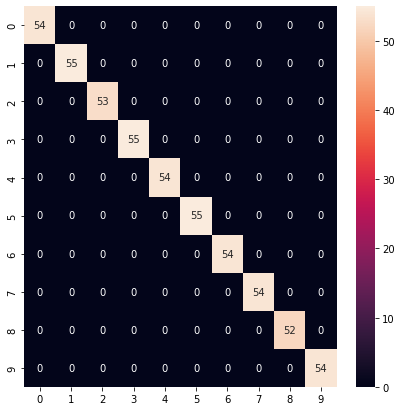

In [53]:
#view the classification_report and confusion matrix

y_pred_test = clf.predict(X_test)

print(classification_report(y_pred_test,y_test))
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_pred_test,y_test), annot = True)

### RANDOM FORESTS CLASSIFIER FOR DIGIT RECOGNITION

#### We import decision tree classifier and build our model on our normalized dataset

In [54]:
#We apply random forest to our dataset in this section and compare performance to SVC

#import our randomforest classifier from sklearn ensemble methods ad build a model using default parameters

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

We examine model performance with default parameeters

In [55]:
# we make some predictions with our model
y_train_pred1 = rfc.predict(X_train)
y_test_pred1 = rfc.predict(X_test)

# we calculate the classifiation accuracy and error using score.
class_acc_train = rfc.score(X_train,y_train) # accuracy score for training set
class_acc_test = rfc.score(X_test,y_test) # accuracy score for test set

class_err_train = 1-class_acc_train
class_err_test = 1 - class_acc_test

print('For default parameter (n_estimators=100,criterion="gini", max_depth=None):\nclassification accuracy for train set: %.4f\nclassification error for\
    train set is: %.4f\n\nclassification accuracy for test set: %.4f\nclassification error for test set:\
    %.4f'%(class_acc_train,class_err_train,class_acc_test,class_err_test))

For default parameter (n_estimators=100,criterion="gini", max_depth=None):
classification accuracy for train set: 1.0000
classification error for    train set is: 0.0000

classification accuracy for test set: 0.9778
classification error for test set:    0.0222


For this model parameters (100 trees, gini criterion and pure leaf nodes i.e tree goes deep unitil each leave nodes are pure), the train accuracy is 100% and test accuracy is 97.78%. Though this is a good model, it might be an overfitted model as indicated by a 100% train accuracy. We try some hyperparameters tuning to increase our test accuracy.

We compare the performance of differet parameters in the order below:

1. Gini vs Entropy for 1 - 100 trees and 'sqrt' feature splitting.
2. Gini vs Entropy for 1 - 100 trees and 'log2' feature splitting.
3. Gini vs Entropy for 1 - 100 trees and no featue splitting.

In [56]:
# 1. Gini vs Entropy for 1 - 100 trees and 'sqrt' feature splitting.

list1_trainc =  [] # this will contain list of train set classification errors for different no of trees and gini criterion
list1_testc = [] # this will contain list of test set classification errors for different no of trees and gini criterion

list2_trainc = [] # this will contain list of train set classification errors for different no of trees and entropy criterion
list2_testc = [] # this will contain list of test set classification errors for different no of trees and entropy criterion

tree_range = np.arange(1,100,1)
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='gini',max_features="sqrt",random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list1_trainc.append (1 - clf.score(X_train,y_train))
    list1_testc.append (1 - clf.score(X_test,y_test))
    
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='entropy',max_features="sqrt",random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list2_trainc.append (1 - clf.score(X_train,y_train))
    list2_testc.append (1 - clf.score(X_test,y_test))

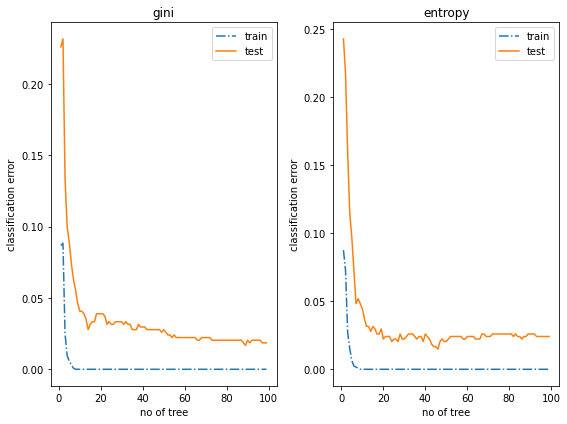

In [57]:
# we plot the classification error for gini and entropy 

fig,axes = plt.subplots(1,2,figsize = (8,6))
# when criterion = 'gini'
axes[0].plot(tree_range,list1_trainc,'-.',label = 'train')
axes[0].plot(tree_range,list1_testc, label = 'test')

# when criterion = 'entropy'
axes[1].plot(tree_range,list2_trainc,'-.',label = 'train' )
axes[1].plot(tree_range,list2_testc,label = 'test')

axes[0].set_xlabel('no of tree')
axes[0].set_ylabel('classification error')
axes[0].set_title('gini')
axes[0].legend()

axes[1].set_xlabel('no of tree')
axes[1].set_ylabel('classification error')
axes[1].set_title('entropy')
axes[1].legend()
plt.tight_layout()

In [58]:
# we find the exact value of the minimum classification error for test set and the corrsponding no of trees

# for gini

min_error1c = min(list1_testc)
no_tree1 = list1_testc.index(min_error1c) + 1

#for entropy
min_error2c = min(list2_testc)
no_tree2 = list2_testc.index(min_error2c)+1

print("For gini criterion and 'sqrt' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error1c,no_tree1))
print("\nFor entropy criterion and 'sqrt' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error2c,no_tree2))

For gini criterion and 'sqrt' spliting, minimum classification error = 0.0167, and no of trees = 89

For entropy criterion and 'sqrt' spliting, minimum classification error = 0.0148, and no of trees = 46


In [59]:
# 2. Gini vs Entropy for 1 - 100 trees and 'log2' feature splitting.

list1_trainc =  [] # this will contain list of train set classification errors for different no of trees and gini criterion
list1_testc = [] # this will contain list of test set classification errors for different no of trees and gini criterion

list2_trainc = [] # this will contain list of train set classification errors for different no of trees and entropy criterion
list2_testc = [] # this will contain list of test set classification errors for different no of trees and entropy criterion

tree_range = np.arange(1,100,1)
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='gini',max_features="log2",random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list1_trainc.append (1 - clf.score(X_train,y_train))
    list1_testc.append (1 - clf.score(X_test,y_test))
    
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='entropy',max_features="log2",random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list2_trainc.append (1 - clf.score(X_train,y_train))
    list2_testc.append (1 - clf.score(X_test,y_test))

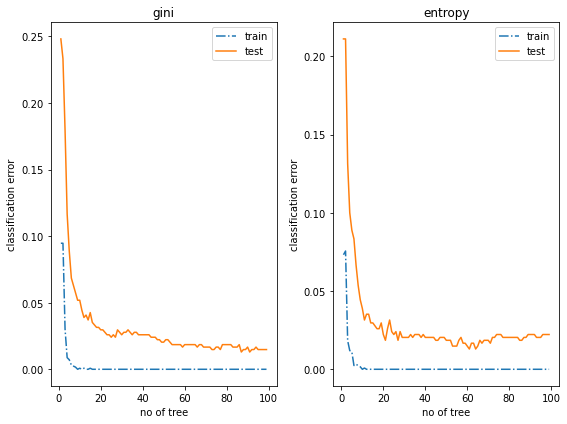

In [60]:
# we plot the classification error for gini and entropy 

fig,axes = plt.subplots(1,2,figsize = (8,6))
# when criterion = 'gini'
axes[0].plot(tree_range,list1_trainc,'-.',label = 'train')
axes[0].plot(tree_range,list1_testc, label = 'test')

# when criterion = 'entropy'
axes[1].plot(tree_range,list2_trainc,'-.',label = 'train' )
axes[1].plot(tree_range,list2_testc,label = 'test')

axes[0].set_xlabel('no of tree')
axes[0].set_ylabel('classification error')
axes[0].set_title('gini')
axes[0].legend()

axes[1].set_xlabel('no of tree')
axes[1].set_ylabel('classification error')
axes[1].set_title('entropy')
axes[1].legend()
plt.tight_layout()

In [61]:
# we find the exact value of the minimum classification error for test set and the corrsponding no of trees

# for gini

min_error1c = min(list1_testc)
no_tree1 = list1_testc.index(min_error1c) + 1

#for entropy
min_error2c = min(list2_testc)
no_tree2 = list2_testc.index(min_error2c)+1

print("For gini criterion and 'log2' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error1c,no_tree1))
print("\nFor entropy criterion and 'log2' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error2c,no_tree2))

For gini criterion and 'log2' spliting, minimum classification error = 0.0130, and no of trees = 87

For entropy criterion and 'log2' spliting, minimum classification error = 0.0130, and no of trees = 61


In [62]:
#3. Gini vs Entropy for 1 - 100 trees and no feature splitting.

list1_trainc =  [] # this will contain list of train set classification errors for different no of trees and gini criterion
list1_testc = [] # this will contain list of test set classification errors for different no of trees and gini criterion

list2_trainc = [] # this will contain list of train set classification errors for different no of trees and entropy criterion
list2_testc = [] # this will contain list of test set classification errors for different no of trees and entropy criterion

tree_range = np.arange(1,100,1)
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='gini',random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list1_trainc.append (1 - clf.score(X_train,y_train))
    list1_testc.append (1 - clf.score(X_test,y_test))
    
for n_tree in tree_range:
    clf = RandomForestClassifier(n_estimators=n_tree,criterion='entropy',random_state=123)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    list2_trainc.append (1 - clf.score(X_train,y_train))
    list2_testc.append (1 - clf.score(X_test,y_test))

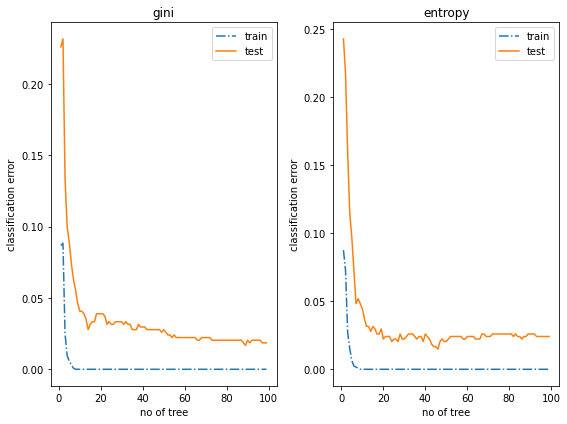

In [63]:
# we plot the classification error for gini and entropy 

fig,axes = plt.subplots(1,2,figsize = (8,6))
# when criterion = 'gini'
axes[0].plot(tree_range,list1_trainc,'-.',label = 'train')
axes[0].plot(tree_range,list1_testc, label = 'test')

# when criterion = 'entropy'
axes[1].plot(tree_range,list2_trainc,'-.',label = 'train' )
axes[1].plot(tree_range,list2_testc,label = 'test')

axes[0].set_xlabel('no of tree')
axes[0].set_ylabel('classification error')
axes[0].set_title('gini')
axes[0].legend()

axes[1].set_xlabel('no of tree')
axes[1].set_ylabel('classification error')
axes[1].set_title('entropy')
axes[1].legend()
plt.tight_layout()

In [64]:
# we find the exact value of the minimum classification error for test set and the corrsponding no of trees

# for gini

min_error1c = min(list1_testc)
no_tree1 = list1_testc.index(min_error1c) + 1

#for entropy
min_error2c = min(list2_testc)
no_tree2 = list2_testc.index(min_error2c)+1

print("For gini criterion and 'no' spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error1c,no_tree1))
print("\nFor entropy criterion and no spliting, minimum classification error\
 = %.4f, and no of trees = %d"%(min_error2c,no_tree2))

For gini criterion and 'no' spliting, minimum classification error = 0.0167, and no of trees = 89

For entropy criterion and no spliting, minimum classification error = 0.0148, and no of trees = 46


The maximum accuracy obtained is 98.7% and this partains to gini criterion and 'sqrt' feature splitting. To conclude, we do a gridsearch to find the optimum overall parameters using cross validationn.

In [65]:
# we implement a gridsearch for different no of trees, criterion and split method to find model with the best accuracy.\
#  We have a balanced dataset so accuracy is a good perfromance test.

rfc = RandomForestClassifier()
no_tree = np.arange(1,100,1)
parameters = [
    {'criterion':['gini','entropy'],'n_estimators':no_tree,'max_features':['log2','sqrt','auto']},
]
clf2 = GridSearchCV(estimator = rfc,param_grid=parameters,scoring='accuracy',cv= 3,verbose=1)
clf2.fit(X_test,y_test)

Fitting 3 folds for each of 594 candidates, totalling 1782 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['log2', 'sqrt', 'auto'],
                          'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             scoring='accuracy', verbose=1)

In [66]:
# check best parameters for our model from gridsearch
criterion = clf2.best_params_['criterion']
n_estimator = clf2.best_params_['n_estimators']
split = clf2.best_params_['max_features']
best_accuracy = clf2.score(X_test,y_test)*100
least_error = 100 - best_accuracy

print(f'Best random forest classifier model for our data is the {criterion}\
 criterion with \nno of trees = {n_estimator}\nsplit using {split}.\nmodel accuarcy = {best_accuracy}%\n\
classification error = {least_error}%')

Best random forest classifier model for our data is the gini criterion with 
no of trees = 67
split using auto.
model accuarcy = 100.0%
classification error = 0.0%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        54
           8       1.00      1.00      1.00        52
           9       1.00      1.00      1.00        54

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



<AxesSubplot:>

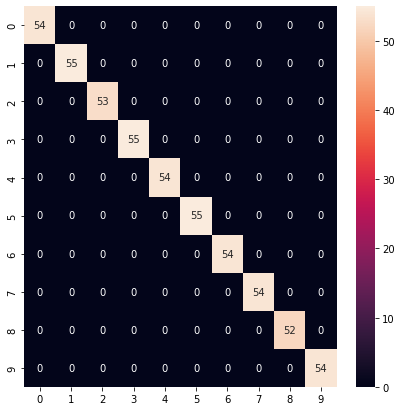

In [68]:
#view the classification_report and confusion matrix
plt.figure(figsize=(7,7))
y_pred_test = clf2.predict(X_test)
print(classification_report(y_pred_test,y_test))
sns.heatmap(confusion_matrix(y_pred_test,y_test), annot = True)

Both Random Forest and Support Vector classified our data with 100% accuracy.